### DACON(데이콘) 데이콘 Basic 자동차 가격 예측 AI 경진대회

##### 데이터 전처리

In [472]:
import pandas as pd

# train.csv에서 split 하여 모델링
# test.csv는 데이콘 채첨 데이터

df = pd.read_csv('data//train.csv')
df.describe()

,생산년도,모델출시년도,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
count,57920.000000,57920.000000,5.792000e+04,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000,57920.000000
mean,2011.355352,2008.033408,1.678691e+05,1788.160135,0.000483,0.425242,0.517956,0.010290,0.046029,52.211752
std,5.174108,5.087963,8.319120e+04,545.413818,0.021982,0.494384,0.499682,0.100918,0.209550,35.399718
min,1978.000000,1983.000000,1.000000e+00,875.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.170000
25%,2008.000000,2004.000000,1.114345e+05,1461.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.570000
50%,2011.000000,2008.000000,1.710000e+05,1753.000000,0.000000,0.000000,1.000000,0.000000,0.000000,42.250000
75%,2016.000000,2012.000000,2.200000e+05,1995.000000,0.000000,1.000000,1.000000,0.000000,0.000000,73.970000
max,2022.000000,2021.000000,2.500000e+06,6300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,156.000000


In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57920 entries, 0 to 57919
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           57920 non-null  object 
 1   생산년도         57920 non-null  int64  
 2   모델출시년도       57920 non-null  int64  
 3   브랜드          57920 non-null  object 
 4   차량모델명        57920 non-null  object 
 5   판매도시         57920 non-null  object 
 6   판매구역         57920 non-null  object 
 7   주행거리         57920 non-null  int64  
 8   배기량          57920 non-null  int64  
 9   압축천연가스(CNG)  57920 non-null  int64  
 10  경유           57920 non-null  int64  
 11  가솔린          57920 non-null  int64  
 12  하이브리드        57920 non-null  int64  
 13  액화석유가스(LPG)  57920 non-null  int64  
 14  가격           57920 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 6.6+ MB


In [474]:
df.sample(20)

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
5076,TRAIN_05076,2010,2008,citroen,berlingo,UOT,MAZ,176000,1560,0,1,0,0,0,32.37
33527,TRAIN_33527,2017,2014,volkswagen,passat,PIA,MAZ,83568,1395,0,0,1,0,0,88.40
29464,TRAIN_29464,2009,2006,honda,civic,NAG,SWI,184357,1799,0,0,1,0,0,38.87
44636,TRAIN_44636,1999,1996,skoda,octavia,LEG,DOL,208150,1598,0,0,1,0,0,5.19
48670,TRAIN_48670,2007,2002,seat,ibiza,CAA,WIE,178000,1390,0,0,1,0,0,14.69
4263,TRAIN_04263,2011,2006,ford,s-max,KAL,WIE,315232,1997,0,1,0,0,0,45.50
45967,TRAIN_45967,1997,1996,bmw,seria-5,SOS,SLA,343000,1991,0,0,0,0,1,9.04
24180,TRAIN_24180,2004,2004,audi,a6,RAD,MAZ,253000,3123,0,0,1,0,0,25.87
47328,TRAIN_47328,2017,2012,kia,ceed,JKR,LUB,75000,998,0,0,1,0,0,58.37
48947,TRAIN_48947,2010,2009,mazda,3,WAR,MAZ,198000,2184,0,1,0,0,0,33.67


##### 컬렴명 영어로 바꾸기

In [475]:
# df = df.rename(columns={'생산년도':'Year_prd','모델출시년도':'Year_model','브랜드':'Brand','차량모델명':'Model','판매도시':'City','판매구역':'Area'})
# df = df.rename(columns={'주행거리':'Mileage','배기량':'CC','압축천연가스(CNG)':'Fuel_CNG','경유':'Fuel_Diesel','가솔린':'Fuel_Gasoline','하이브리드':'Fuel_Hybrid','액화석유가스(LPG)':'Fuel_LPG','가격':'Price'})
# df

In [476]:
def columns_toENG(Data):
    
    print("[Preprocessing] def columns_toENG...")
    Data = Data.rename(columns={'생산년도':'Year_prd','모델출시년도':'Year_model','브랜드':'Brand','차량모델명':'Model','판매도시':'City','판매구역':'Area'})
    Data = Data.rename(columns={'주행거리':'Mileage','배기량':'CC','압축천연가스(CNG)':'Fuel_CNG','경유':'Fuel_Diesel','가솔린':'Fuel_Gasoline','하이브리드':'Fuel_Hybrid','액화석유가스(LPG)':'Fuel_LPG','가격':'Price'})

    return Data

df = columns_toENG(df)
df

[Preprocessing] def columns_toENG...


,ID,Year_prd,Year_model,Brand,Model,City,Area,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,TRAIN_57915,2017,2011,mercedes-benz,b-klasa,POZ,WIE,64839,1461,0,1,0,0,0,116.87
57916,TRAIN_57916,2006,2005,opel,zafira,XOK,ZAC,299850,1796,0,0,1,0,0,15.47
57917,TRAIN_57917,2013,2003,fiat,punto,CIE,MAZ,112000,1368,0,0,1,0,0,21.97
57918,TRAIN_57918,2006,2004,opel,astra,ZRI,DOL,189321,1598,0,0,1,0,0,16.77


##### NAN 값 확인 

In [477]:
df.isna().sum()

ID               0
Year_prd         0
Year_model       0
Brand            0
Model            0
City             0
Area             0
Mileage          0
CC               0
Fuel_CNG         0
Fuel_Diesel      0
Fuel_Gasoline    0
Fuel_Hybrid      0
Fuel_LPG         0
Price            0
dtype: int64

##### 중고차 아닌 (Mileage < 200km) 데이터 Drop

In [478]:
# 주행거리가 200km 미만인 데이터 갯수 : 1221개
len(df[df['Mileage']<200])

1221

In [479]:
# 인덱스 파악
newCar_idx = df[df['Mileage']<200].index
newCar_idx

Index([    6,    24,    49,   321,   426,   456,   459,   463,   498,   590,
       ...
       57167, 57339, 57393, 57463, 57470, 57479, 57560, 57653, 57861, 57905],
      dtype='int64', length=1221)

In [480]:
# 원본 데이터 갯수 , 신차 데이터 제외한 갯수
len(df) , len(df.drop(index=newCar_idx))

(57920, 56699)

In [481]:
# Criteria : 중고차 최소 km 기준

def drop_newCar(Data,Criteria):

    print("[Preprocessing] def drop_newCar...")
    print("Before Datasets size : ", len(Data))
    newCar_idx = Data[Data['Mileage']<Criteria].index
    Data = Data.drop(index = newCar_idx)
    print("Delete Datasets size : ",len(newCar_idx))
    print("After Datasets size : ", len(Data))

    return Data

df = drop_newCar(df,200)
df

[Preprocessing] def drop_newCar...
Before Datasets size :  57920
Delete Datasets size :  1221
After Datasets size :  56699


,ID,Year_prd,Year_model,Brand,Model,City,Area,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,TRAIN_57915,2017,2011,mercedes-benz,b-klasa,POZ,WIE,64839,1461,0,1,0,0,0,116.87
57916,TRAIN_57916,2006,2005,opel,zafira,XOK,ZAC,299850,1796,0,0,1,0,0,15.47
57917,TRAIN_57917,2013,2003,fiat,punto,CIE,MAZ,112000,1368,0,0,1,0,0,21.97
57918,TRAIN_57918,2006,2004,opel,astra,ZRI,DOL,189321,1598,0,0,1,0,0,16.77


##### 필요없는 컬럼 제거 (ID 고유키 값 DROP )

In [482]:
def drop_features(Data,needless_columns):

    print("[Preprocessing] def drop_features...")
    Data = Data.drop(columns = needless_columns)

    return Data

# needless_columns : 필요없는 컮럼 제거

needless_columns = ['ID']

df = drop_features(df,needless_columns)

[Preprocessing] def drop_features...


In [483]:
df

,Year_prd,Year_model,Brand,Model,City,Area,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price
0,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,2017,2011,mercedes-benz,b-klasa,POZ,WIE,64839,1461,0,1,0,0,0,116.87
57916,2006,2005,opel,zafira,XOK,ZAC,299850,1796,0,0,1,0,0,15.47
57917,2013,2003,fiat,punto,CIE,MAZ,112000,1368,0,0,1,0,0,21.97
57918,2006,2004,opel,astra,ZRI,DOL,189321,1598,0,0,1,0,0,16.77


##### X / Y 데이터셋 분할

In [484]:
def split_X_Y(Data):

    print("[Preprocessing] def split_X_Y...")
    X= Data.drop(columns='Price')
    Y= Data['Price']

    return X , Y

X , Y = split_X_Y(df)
X[:5]

[Preprocessing] def split_X_Y...


,Year_prd,Year_model,Brand,Model,City,Area,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG
0,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0
1,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0
2,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0
3,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0
4,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0


In [485]:
Y[:5]

0    51.74
1    41.47
2    17.81
3    18.20
4    17.55
Name: Price, dtype: float64

##### 문자 (Brand, Model, City, Area) 숫자로 Encoding

In [486]:
dict(df.dtypes)

{'Year_prd': dtype('int64'),
 'Year_model': dtype('int64'),
 'Brand': dtype('O'),
 'Model': dtype('O'),
 'City': dtype('O'),
 'Area': dtype('O'),
 'Mileage': dtype('int64'),
 'CC': dtype('int64'),
 'Fuel_CNG': dtype('int64'),
 'Fuel_Diesel': dtype('int64'),
 'Fuel_Gasoline': dtype('int64'),
 'Fuel_Hybrid': dtype('int64'),
 'Fuel_LPG': dtype('int64'),
 'Price': dtype('float64')}

In [487]:
df.dtypes.values

array([dtype('int64'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('float64')], dtype=object)

In [488]:
# Object 형 (ID 제외) -> Int 형 
def format_features(Data):
    
    print("[Preprocessing] def format_features...")
    from sklearn.preprocessing import LabelEncoder

    Data_dtypes = dict(Data.dtypes)

    for column,dtype in Data_dtypes.items():

        # ID 제외 dtype 이 문자형인 column Label Encoding
        if dtype == 'object':
            if column != 'ID':
                le = LabelEncoder()
                le = le.fit(Data[column])
                print("-------------------------------------------------------")
                print("column : ", column)
                print(le.classes_ )
                Data[column] = le.transform(Data[column])

    return Data

X = format_features(X)
X

[Preprocessing] def format_features...
-------------------------------------------------------
column :  Brand
['audi' 'bmw' 'citroen' 'fiat' 'ford' 'honda' 'hyundai' 'kia' 'mazda'
 'mercedes-benz' 'mitsubishi' 'nissan' 'opel' 'peugeot' 'renault' 'seat'
 'skoda' 'toyota' 'volkswagen' 'volvo']
-------------------------------------------------------
column :  Model
['2' '3' '3008' '5' '5008' '6' '80' 'a-klasa' 'a3' 'a4' 'a5' 'a6'
 'a6-allroad' 'a7' 'a8' 'accord' 'agila' 'alhambra' 'almera' 'astra'
 'auris' 'avensis' 'aygo' 'b-klasa' 'berlingo' 'bravo' 'c-klasa' 'c-max'
 'c4-picasso' 'c5' 'caddy' 'carens' 'ceed' 'civic' 'cl-klasa' 'clio'
 'clk-klasa' 'cls-klasa' 'colt' 'combo' 'corolla' 'corsa' 'cr-v' 'doblo'
 'e-klasa' 'elantra' 'espace' 'fabia' 'fiesta' 'focus' 'frontera'
 'g-klasa' 'galaxy' 'gl-klasa' 'gle-klasa' 'golf' 'grand-scenic' 'hr-v'
 'i10' 'i20' 'i30' 'ibiza' 'insignia' 'jazz' 'jetta' 'juke' 'ka' 'kangoo'
 'kuga' 'laguna' 'lancer' 'land-cruiser' 'leon' 'm-klasa' 'megane'
 'mer

,Year_prd,Year_model,Brand,Model,City,Area,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG
0,2018,2014,16,47,1214,12,85231,999,0,0,1,0,0
1,2010,2006,17,20,2137,13,135000,1598,0,0,1,0,0
2,2002,2002,9,36,785,15,255223,1796,0,0,1,0,0
3,2006,2001,11,133,546,15,238000,2184,0,1,0,0,0
4,2007,2007,3,25,1839,5,251000,1910,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,2017,2011,9,23,1957,15,64839,1461,0,1,0,0,0
57916,2006,2005,12,142,2941,16,299850,1796,0,0,1,0,0
57917,2013,2003,3,90,287,6,112000,1368,0,0,1,0,0
57918,2006,2004,12,19,3174,0,189321,1598,0,0,1,0,0


##### ※ 선택 ※
##### Year_prd(생산년도) , Year_model(모델출시년도) MinMax Scaling

In [489]:
X['Year_prd']

0        2018
1        2010
2        2002
3        2006
4        2007
         ... 
57915    2017
57916    2006
57917    2013
57918    2006
57919    2005
Name: Year_prd, Length: 56699, dtype: int64

In [490]:
import numpy as np

np.array(X['Year_prd'])

array([2018, 2010, 2002, ..., 2013, 2006, 2005], dtype=int64)

In [491]:
# MinMaxScaler는 2d array로 넣어야함
np.array(X['Year_prd']).reshape(-1,1)

array([[2018],
       [2010],
       [2002],
       ...,
       [2013],
       [2006],
       [2005]], dtype=int64)

In [492]:
def MinMaxScaling(X_Data,get_MinMax_Columns):
    
    print("[Preprocessing] def MinMaxScaling...")

    from sklearn.preprocessing import MinMaxScaler
    import numpy as np

    if len(get_MinMax_Columns) == 0:
        print("Execute MinMaxScaling : False")
    else:
        print("Execute MinMaxScaling : True")

    for column in get_MinMax_Columns:
        scaler = MinMaxScaler()
        print(column, " get MinMaxScaling")
        scaler.fit(np.array(X_Data[column]).reshape(-1,1))
        X_Data[column] = scaler.transform(np.array(X_Data[column]).reshape(-1,1))
    
    return X_Data

X = MinMaxScaling(X,['Year_prd','Year_model'])
X

[Preprocessing] def MinMaxScaling...
Execute MinMaxScaling : True
Year_prd  get MinMaxScaling
Year_model  get MinMaxScaling


,Year_prd,Year_model,Brand,Model,City,Area,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG
0,0.930233,0.815789,16,47,1214,12,85231,999,0,0,1,0,0
1,0.744186,0.605263,17,20,2137,13,135000,1598,0,0,1,0,0
2,0.558140,0.500000,9,36,785,15,255223,1796,0,0,1,0,0
3,0.651163,0.473684,11,133,546,15,238000,2184,0,1,0,0,0
4,0.674419,0.631579,3,25,1839,5,251000,1910,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,0.906977,0.736842,9,23,1957,15,64839,1461,0,1,0,0,0
57916,0.651163,0.578947,12,142,2941,16,299850,1796,0,0,1,0,0
57917,0.813953,0.526316,3,90,287,6,112000,1368,0,0,1,0,0
57918,0.651163,0.552632,12,19,3174,0,189321,1598,0,0,1,0,0


<Axes: xlabel='Year_prd', ylabel='Count'>

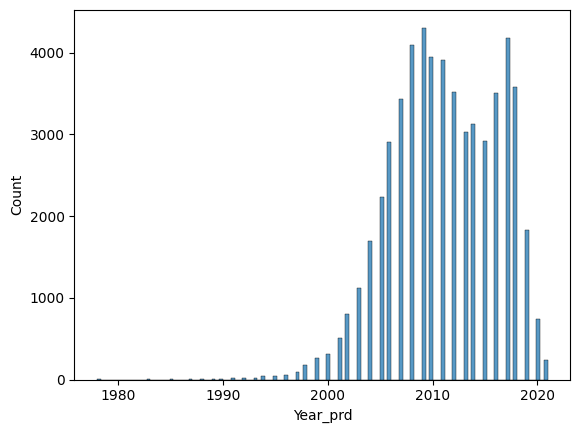

In [493]:
# MinMax Scaling 이전 

# Year_prd
import seaborn as sns

sns.histplot(x=df['Year_prd'])

<Axes: xlabel='Year_prd', ylabel='Count'>

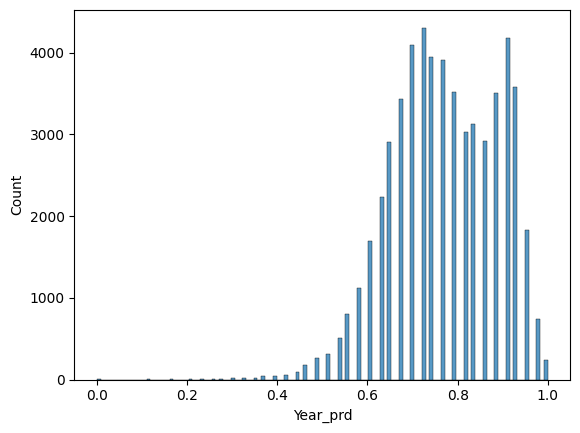

In [494]:
sns.histplot(x=X['Year_prd'])

<Axes: xlabel='Year_model', ylabel='Count'>

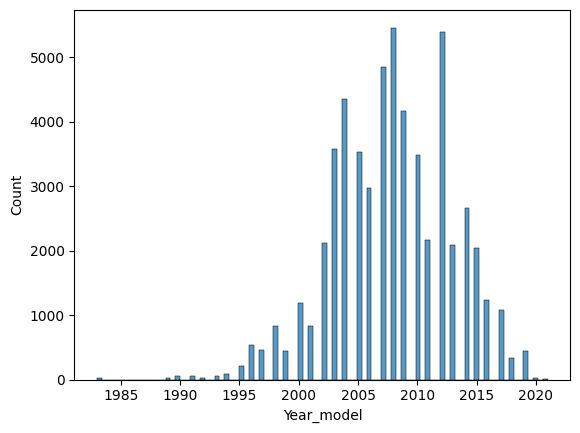

In [495]:
# Year_prd

sns.histplot(x=df['Year_model'])

<Axes: xlabel='Year_model', ylabel='Count'>

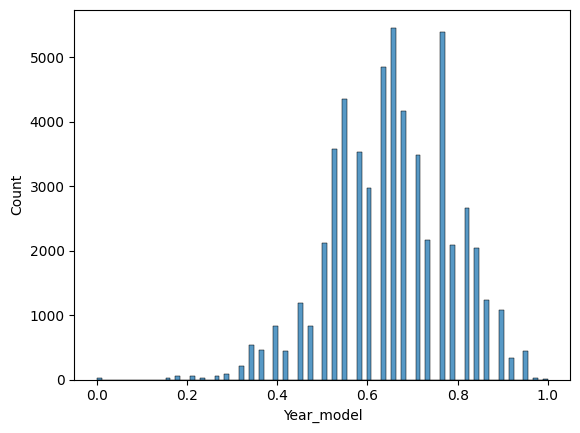

In [496]:
sns.histplot(x=X['Year_model'])

##### 데이터 전처리 완료

In [497]:
# X datasets
X

,Year_prd,Year_model,Brand,Model,City,Area,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG
0,0.930233,0.815789,16,47,1214,12,85231,999,0,0,1,0,0
1,0.744186,0.605263,17,20,2137,13,135000,1598,0,0,1,0,0
2,0.558140,0.500000,9,36,785,15,255223,1796,0,0,1,0,0
3,0.651163,0.473684,11,133,546,15,238000,2184,0,1,0,0,0
4,0.674419,0.631579,3,25,1839,5,251000,1910,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,0.906977,0.736842,9,23,1957,15,64839,1461,0,1,0,0,0
57916,0.651163,0.578947,12,142,2941,16,299850,1796,0,0,1,0,0
57917,0.813953,0.526316,3,90,287,6,112000,1368,0,0,1,0,0
57918,0.651163,0.552632,12,19,3174,0,189321,1598,0,0,1,0,0


In [498]:
# Y datatset
Y

0         51.74
1         41.47
2         17.81
3         18.20
4         17.55
          ...  
57915    116.87
57916     15.47
57917     21.97
57918     16.77
57919     19.50
Name: Price, Length: 56699, dtype: float64

##### 데이터 전처리 통합

In [499]:
df = pd.read_csv('data//train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57920 entries, 0 to 57919
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           57920 non-null  object 
 1   생산년도         57920 non-null  int64  
 2   모델출시년도       57920 non-null  int64  
 3   브랜드          57920 non-null  object 
 4   차량모델명        57920 non-null  object 
 5   판매도시         57920 non-null  object 
 6   판매구역         57920 non-null  object 
 7   주행거리         57920 non-null  int64  
 8   배기량          57920 non-null  int64  
 9   압축천연가스(CNG)  57920 non-null  int64  
 10  경유           57920 non-null  int64  
 11  가솔린          57920 non-null  int64  
 12  하이브리드        57920 non-null  int64  
 13  액화석유가스(LPG)  57920 non-null  int64  
 14  가격           57920 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 6.6+ MB


In [500]:
def data_preprocessing(Data,Criteria,needless_columns,get_MinMax_Columns):

    print("[Preprocessing] Start")
    
    # 컬럼명 영어로 변환
    Data = columns_toENG(Data)
    
    # 중고차가 아닌 (주행거리 < 200) 데이터 drop
    Data = drop_newCar(Data,Criteria)
    
    # 학습에 필요없는 컬럼 drop
    Data = drop_features(Data,needless_columns)

    # X, Y 데이터 분할 
    X , Y = split_X_Y(Data)

    # obeject형 데이터 LabelEncoding
    X = format_features(X)

    # MinMax 스케일링
    X = MinMaxScaling(X,get_MinMax_Columns)

    print("[Preprocessing] End")

    return X , Y

# Criteria : 중고차 최소 km 기준
Criteria = 200

# needless_features : 필요없는 컬럼
# ID는 데이털르 구분하는 고유 키값이지만 학습에는 필요없음 
needless_columns = ['ID']

# MinMaxScaling은 선택!!
# get_MinMax_Columns : MinMax Scaling 원하는 컬럼
get_MinMax_Columns = []
# MinMax 원할 때 컬럼명 append
# get_MinMax_Columns = ['Year_prd','Year_model']

X , Y = data_preprocessing(df,Criteria,needless_columns,get_MinMax_Columns)


[Preprocessing] Start
[Preprocessing] def columns_toENG...
[Preprocessing] def drop_newCar...
Before Datasets size :  57920
Delete Datasets size :  1221
After Datasets size :  56699
[Preprocessing] def drop_features...
[Preprocessing] def split_X_Y...
[Preprocessing] def format_features...
-------------------------------------------------------
column :  Brand
['audi' 'bmw' 'citroen' 'fiat' 'ford' 'honda' 'hyundai' 'kia' 'mazda'
 'mercedes-benz' 'mitsubishi' 'nissan' 'opel' 'peugeot' 'renault' 'seat'
 'skoda' 'toyota' 'volkswagen' 'volvo']
-------------------------------------------------------
column :  Model
['2' '3' '3008' '5' '5008' '6' '80' 'a-klasa' 'a3' 'a4' 'a5' 'a6'
 'a6-allroad' 'a7' 'a8' 'accord' 'agila' 'alhambra' 'almera' 'astra'
 'auris' 'avensis' 'aygo' 'b-klasa' 'berlingo' 'bravo' 'c-klasa' 'c-max'
 'c4-picasso' 'c5' 'caddy' 'carens' 'ceed' 'civic' 'cl-klasa' 'clio'
 'clk-klasa' 'cls-klasa' 'colt' 'combo' 'corolla' 'corsa' 'cr-v' 'doblo'
 'e-klasa' 'elantra' 'espace' 'f

In [501]:
# 데이터 저장
import os

preprocess_data_dir = 'preprocessed_data'

if not os.path.exists(preprocess_data_dir):
    os.makedirs(preprocess_data_dir)
X.to_csv(preprocess_data_dir+'/preprocess_X_data.csv')
Y.to_csv(preprocess_data_dir+'/preprocess_Y_data.csv')

In [502]:
preprocessed_X = pd.read_csv(preprocess_data_dir+'/preprocess_X_data.csv',index_col=0)
preprocessed_X

,Year_prd,Year_model,Brand,Model,City,Area,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG
0,2018,2014,16,47,1214,12,85231,999,0,0,1,0,0
1,2010,2006,17,20,2137,13,135000,1598,0,0,1,0,0
2,2002,2002,9,36,785,15,255223,1796,0,0,1,0,0
3,2006,2001,11,133,546,15,238000,2184,0,1,0,0,0
4,2007,2007,3,25,1839,5,251000,1910,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,2017,2011,9,23,1957,15,64839,1461,0,1,0,0,0
57916,2006,2005,12,142,2941,16,299850,1796,0,0,1,0,0
57917,2013,2003,3,90,287,6,112000,1368,0,0,1,0,0
57918,2006,2004,12,19,3174,0,189321,1598,0,0,1,0,0


In [503]:
preprocessed_Y = pd.read_csv(preprocess_data_dir+'/preprocess_Y_data.csv',index_col=0)
preprocessed_Y

,Price
0,51.74
1,41.47
2,17.81
3,18.20
4,17.55
...,...
57915,116.87
57916,15.47
57917,21.97
57918,16.77
